In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = '/home/bigdatas16/1101.csv'
data = pd.read_csv(datapath)

In [4]:
#A(data,2)
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21


In [5]:
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for i in dataList:
        if i - day + 1 >= 0:
            # 移動平均數 = 採樣天數的股價合計 / 採樣天數
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries

In [6]:
# 乖離率(BIAS)
def BIAS(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for item in dataList:
        if item-day+1 >= 0:
            tmp = (data['Close'][item]-data['MA'+str(day)][item])/(data['MA'+str(day)][item])*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    tmpSeries = pd.Series(tmpList)
    data['BIAS'+str(day)] = tmpSeries

In [7]:
(11.28 - 11.692)/11.692

-0.035237769414984674

In [8]:
MA(data,10)
BIAS(data,10)
data.head(11)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,BIAS10
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,-4.600812


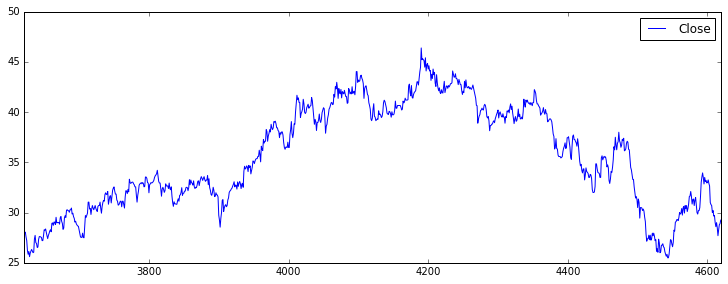

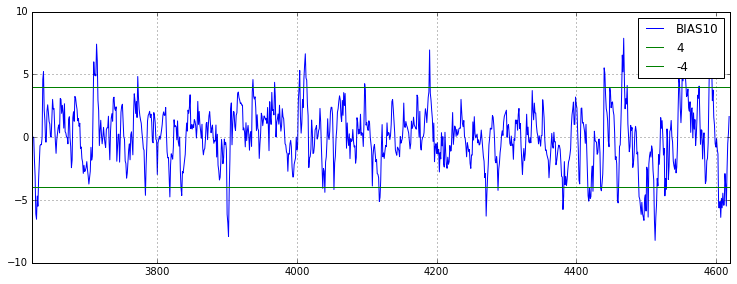

In [10]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close"]][3621:4621].plot()
data[["BIAS10"]][3621:4621].plot()
plt.axhline(4,color = 'g',linestyle = '-',label = '4')
plt.axhline(-4,color = 'g',linestyle = '-',label = '-4')
plt.grid()
plt.legend();

In [11]:
# 乖離率(BIAS)
def BIAS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item-day+1 >= 0:
            tmp = (data['Close'][item]-data['MA'+str(day)][item])/(data['MA'+str(day)][item])*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    tmpSeries = pd.Series(tmpList)
    data['BIAS'+str(day)] = tmpSeries

In [12]:
MA(data,10)
BIAS_lag(data,10)

In [13]:
data.head(50)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,BIAS10
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,0.000000


In [14]:
for i in range(24):
    MA(data,1+i)
    BIAS_lag(data,1+i)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 57 columns):
Date        4621 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
MA10        4621 non-null float64
BIAS10      4621 non-null float64
MA1         4620 non-null float64
BIAS1       4621 non-null float64
MA2         4621 non-null float64
BIAS2       4621 non-null float64
MA3         4621 non-null float64
BIAS3       4621 non-null float64
MA4         4621 non-null float64
BIAS4       4621 non-null float64
MA5         4621 non-null float64
BIAS5       4621 non-null float64
MA6         4621 non-null float64
BIAS6       4621 non-null float64
MA7         4621 non-null float64
BIAS7       4621 non-null float64
MA8         4621 non-null float64
BIAS8     

In [16]:
data[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,MA20,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24
4618,2016/5/24,29.0,29.15,28.8,28.90,4966.0,143707.0,0.35,20.50,28.815000,...,30.280000,-5.558288,30.419048,-5.940902,30.540909,-6.341463,30.669565,-6.618735,30.760417,-6.952951
4619,2016/5/25,29.5,29.50,28.9,29.25,5094.0,148848.0,1.21,20.74,28.775000,...,30.095000,-4.557464,30.230952,-4.993738,30.365909,-5.372823,30.484783,-5.769776,30.610417,-6.048087
4620,2016/5/26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.672222,...,29.942105,-2.807775,30.095000,-3.244861,30.230952,-3.674875,30.365909,-4.050488,30.484783,-4.444293


In [17]:
data = data.drop(data.index[4620])

In [18]:
data[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,MA20,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24
4618,2016/5/24,29.0,29.15,28.8,28.90,4966.0,143707.0,0.35,20.50,28.815,...,30.280,-5.558288,30.419048,-5.940902,30.540909,-6.341463,30.669565,-6.618735,30.760417,-6.952951
4619,2016/5/25,29.5,29.50,28.9,29.25,5094.0,148848.0,1.21,20.74,28.775,...,30.095,-4.557464,30.230952,-4.993738,30.365909,-5.372823,30.484783,-5.769776,30.610417,-6.048087


In [19]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries

In [20]:
UP_DOWN(data)

In [21]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,BIAS20,MA21,BIAS21,MA22,BIAS22,MA23,BIAS23,MA24,BIAS24,UP_DOWN
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
data1 = data.drop(['Date', 'Open', 'High','Low','Close','Volume_n','Volume_m','return','PE','MA1','MA2','MA3','MA4','MA5','MA6','MA7','MA8','MA9','MA10','MA11','MA12','MA13','MA14','MA15','MA16','MA17','MA18','MA19','MA20','MA21','MA22','MA23','MA24'], axis=1)

In [23]:
data1.head()

,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,BIAS9,...,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23,BIAS24,UP_DOWN
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,-0.638978,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-0.810373,-1.502146,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-0.948454,-1.798855,-2.536011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 25 columns):
BIAS10     4620 non-null float64
BIAS1      4620 non-null float64
BIAS2      4620 non-null float64
BIAS3      4620 non-null float64
BIAS4      4620 non-null float64
BIAS5      4620 non-null float64
BIAS6      4620 non-null float64
BIAS7      4620 non-null float64
BIAS8      4620 non-null float64
BIAS9      4620 non-null float64
BIAS11     4620 non-null float64
BIAS12     4620 non-null float64
BIAS13     4620 non-null float64
BIAS14     4620 non-null float64
BIAS15     4620 non-null float64
BIAS16     4620 non-null float64
BIAS17     4620 non-null float64
BIAS18     4620 non-null float64
BIAS19     4620 non-null float64
BIAS20     4620 non-null float64
BIAS21     4620 non-null float64
BIAS22     4620 non-null float64
BIAS23     4620 non-null float64
BIAS24     4620 non-null float64
UP_DOWN    4620 non-null int64
dtypes: float64(24), int64(1)
memory usage: 938.4 KB


In [25]:
data1 = data1.fillna(-1)

In [26]:
data1.head()

,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,BIAS9,...,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23,BIAS24,UP_DOWN
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,-0.638978,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-0.810373,-1.502146,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-0.948454,-1.798855,-2.536011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
cols = data1.columns.tolist()
cols[24]

'UP_DOWN'

In [28]:
data1 = data1[[cols[24]] + cols[0:23]]

In [29]:
data1.head(10)

,UP_DOWN,BIAS10,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,...,BIAS14,BIAS15,BIAS16,BIAS17,BIAS18,BIAS19,BIAS20,BIAS21,BIAS22,BIAS23
0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,-0.638978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,-0.810373,-1.502146,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,-0.948454,-1.798855,-2.536011,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,-0.586265,-1.411960,-2.224053,-2.959451,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0.0,-0.423012,-0.953717,-1.691376,-2.453174,-3.167421,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,-2.884615,-4.086331,-4.961506,-5.847458,-6.690929,-7.460733,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,1.024499,-0.584454,-1.583858,-2.409639,-3.269832,-4.107272,-4.885720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,1.047120,2.086394,1.135371,0.398821,-0.287026,-1.049805,-1.822806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
X = data1.iloc[:,1:]
Y = data1.iloc[:,0:1] 

In [240]:
n = len(data['Date'])/2
#X_train = X.iloc[:n, :]
#Y_train = Y.iloc[:n]
#X_test = X.iloc[n:, :]
#Y_test = Y.iloc[n:]

In [301]:
train_data = data1.iloc[:n,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[n:,:]
test_sql = sql_sc.createDataFrame(test_data)

In [305]:
#test_data

In [257]:
sql_sc = SQLContext(sc)
sql_sc

In [252]:
X_train_sql = sql_sc.createDataFrame(X_train)
Y_train_sql = sql_sc.createDataFrame(Y_train)
X_test_sql = sql_sc.createDataFrame(X_test)
Y_test_sql = sql_sc.createDataFrame(Y_test)

In [119]:
Y_train_sql.show(2)

+-------+
|UP_DOWN|
+-------+
|      0|
|      0|
+-------+
only showing top 2 rows



In [243]:
X_train_sql.show(2)

+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
|BIAS10|BIAS1|BIAS2|BIAS3|BIAS4|BIAS5|BIAS6|BIAS7|BIAS8|BIAS9|BIAS11|BIAS12|BIAS13|BIAS14|BIAS15|BIAS16|BIAS17|BIAS18|BIAS19|BIAS20|BIAS21|BIAS22|BIAS23|
+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|
|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|
+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
only showing top 2 rows



In [199]:
train_sql.show(2)

+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
|UP_DOWN|BIAS10|BIAS1|BIAS2|BIAS3|BIAS4|BIAS5|BIAS6|BIAS7|BIAS8|BIAS9|BIAS11|BIAS12|BIAS13|BIAS14|BIAS15|BIAS16|BIAS17|BIAS18|BIAS19|BIAS20|BIAS21|BIAS22|BIAS23|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+
only showing top 2 rows



In [311]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [271]:
train_sql.show(2)

+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
|UP_DOWN|BIAS10|BIAS1|BIAS2|BIAS3|BIAS4|BIAS5|BIAS6|BIAS7|BIAS8|BIAS9|BIAS11|BIAS12|BIAS13|BIAS14|BIAS15|BIAS16|BIAS17|BIAS18|BIAS19|BIAS20|BIAS21|BIAS22|BIAS23|  features|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|(23,[],[])|
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|(23,[],[])|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+--

In [179]:
#assembler = VectorAssembler(inputCols=["BIAS1","BIAS2"],outputCol="features")
#output = assembler.transform(X_train_sql)

In [234]:
#train_sql.show()

In [260]:
assembler = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
train_sql = assembler.transform(train_sql)

In [261]:
train_sql.select("features").show(5)

+--------------------+
|            features|
+--------------------+
|          (23,[],[])|
|          (23,[],[])|
|(23,[1],[-0.63897...|
|(23,[1,2],[-0.810...|
|(23,[1,2,3],[-0.9...|
+--------------------+
only showing top 5 rows



In [262]:
train_sql.select("UP_DOWN").show(5)

+-------+
|UP_DOWN|
+-------+
|      0|
|      0|
|      0|
|      0|
|      0|
+-------+
only showing top 5 rows



In [263]:
train_sql.show(2)

+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
|UP_DOWN|BIAS10|BIAS1|BIAS2|BIAS3|BIAS4|BIAS5|BIAS6|BIAS7|BIAS8|BIAS9|BIAS11|BIAS12|BIAS13|BIAS14|BIAS15|BIAS16|BIAS17|BIAS18|BIAS19|BIAS20|BIAS21|BIAS22|BIAS23|  features|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+----------+
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|(23,[],[])|
|      0|   0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|   0.0|(23,[],[])|
+-------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+--

In [287]:
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)

In [288]:
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)

In [297]:
#rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

In [298]:
rf

RandomForestClassifier_4348be4bd979c7cbf39d

In [299]:
# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])

In [300]:
model = pipeline.fit(train_sql)

In [307]:
assembler = VectorAssembler(inputCols=["BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5","BIAS6"
                                       ,"BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23"],outputCol="features")
test_sql = assembler.transform(test_sql)

In [308]:
predictions = model.transform(test_sql)

In [325]:
predictions.show(2)

+-------+-------------------+-----+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------------+--------------------+--------------------+--------------------+------------+--------------------+--------------------+--------------------+----------+
|UP_DOWN|             BIAS10|BIAS1|              BIAS2|              BIAS3|              BIAS4|               BIAS5|               BIAS6|               BIAS7|              BIAS8|              BIAS9|             BIAS11|              BIAS12|              BIAS13|              BIAS14|             BIAS15|             BIAS16|             BIAS17|              BIAS18|             BIAS19|             BIAS20|            BIAS21|       

In [322]:
predictions.select("prediction", "indexedLabel", "features").show(10)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         1.0|[0.0,0.0838691641...|
|       0.0|         0.0|[0.0,0.6107717934...|
|       0.0|         0.0|[0.0,-0.862788755...|
|       0.0|         1.0|[0.0,-0.849377123...|
|       0.0|         0.0|[0.0,0.0,-0.56785...|
|       0.0|         0.0|[0.0,-0.458978772...|
|       0.0|         0.0|[0.0,-0.434153400...|
|       0.0|         1.0|[0.0,-0.437956204...|
|       0.0|         0.0|[0.0,0.3506721215...|
|       0.0|         1.0|[0.0,-0.262773722...|
+----------+------------+--------------------+
only showing top 10 rows



In [328]:
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")

In [329]:
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.550222


In [338]:
prediction_1101 = predictions.select("prediction", "indexedLabel")

In [339]:
prediction_1101

DataFrame[prediction: double, indexedLabel: double]

In [341]:
import pandas
prediction_1101_pandas = prediction_1101.toPandas()
prediction_1101_pandas.head(10)

,prediction,indexedLabel
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,1.0
8,0.0,0.0
9,0.0,1.0


In [343]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [345]:
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
cm

array([[1300,   17],
       [ 951,   42]])

In [347]:
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,1300,17
1.0,951,42


In [348]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

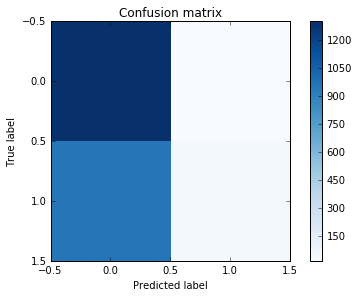

In [349]:
plot_confusion_matrix(cm)
plt.show()

In [350]:
data_p = data[['Close','Open']][2310:4621].values

In [351]:
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])

In [352]:
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result1.head()

,test,prediction
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [353]:
result2 = pd.concat([data_p1, result1], axis=1)
result2.head()

,Close,Open,test,prediction
0,18.12,17.93,1.0,0.0
1,17.81,18.24,0.0,0.0
2,17.51,17.69,0.0,0.0
3,17.51,17.45,1.0,0.0
4,17.35,17.51,0.0,0.0


In [354]:
result2["Cl - Op"] = result2['Close'] - result2['Open']

In [355]:
result2['profit'] = result2['Cl - Op'] * result2['prediction']

In [356]:
a = result2['profit'].cumsum()
result2['cumsum'] = a
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0


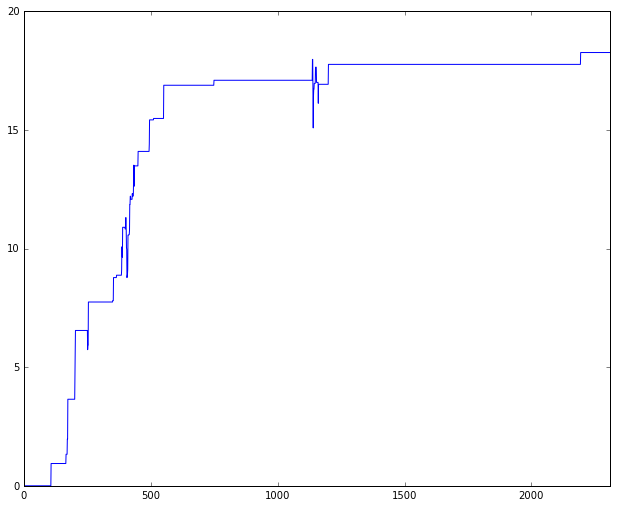

In [357]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [358]:
result2['processing fee'] = (result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)) * result2['prediction']

In [359]:
result2['profit_r_fee'] = result2['profit'] - result2['processing fee']

In [360]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0


In [361]:
b = result2['profit_r_fee'].cumsum()
result2['cumsum_r_fee'] = b
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0


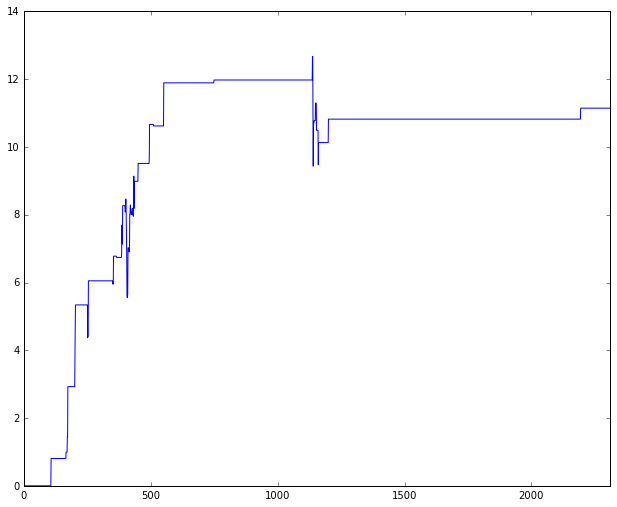

In [362]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
result2['cumsum_r_fee'].plot()

In [364]:
result2

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.00,0.0,0.0,0.000000
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.00,0.0,-0.0,0.000000
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.00,0.0,-0.0,0.000000
3,17.51,17.45,1.0,0.0,0.06,0.0,0.00,0.0,0.0,0.000000
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.00,0.0,-0.0,0.000000
5,17.20,17.38,0.0,0.0,-0.18,-0.0,0.00,0.0,-0.0,0.000000
6,17.05,17.26,0.0,0.0,-0.21,-0.0,0.00,0.0,-0.0,0.000000
7,17.17,17.14,1.0,0.0,0.03,0.0,0.00,0.0,0.0,0.000000
8,17.08,17.48,0.0,0.0,-0.40,-0.0,0.00,0.0,-0.0,0.000000
9,17.32,17.08,1.0,0.0,0.24,0.0,0.00,0.0,0.0,0.000000


In [365]:
result2['profit2'] = 0.0
#len(result2)
result2['profit2'][1]

0.0

In [366]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,0.0


In [367]:
result2['profit2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i] + (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] + result2['Close'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i]

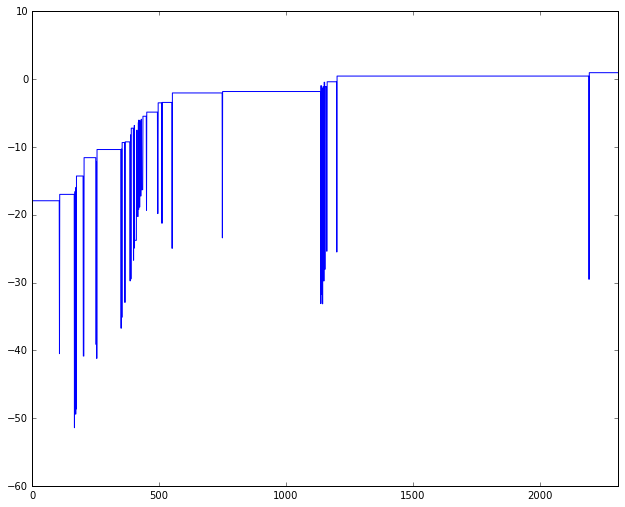

In [368]:
result2['profit2'].plot()

In [369]:
result2['processing_fee_2'] = 0.0

In [370]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2,processing_fee_2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,-17.93,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,-17.93,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0


In [371]:
result2['processing_fee_2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + (-1) * result2['Open'][i+1] - (result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + result2['Close'][i] - (result2['Close'][i])*(4.425/1000.0)
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

In [372]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2,processing_fee_2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,-17.93,-17.93
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,-17.93,-17.93
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93


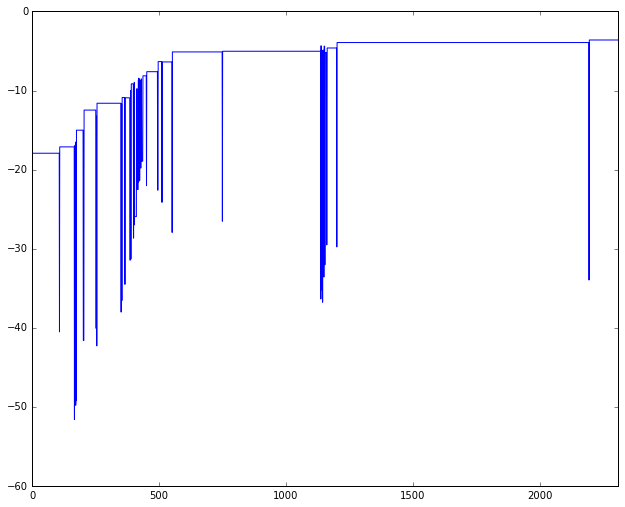

In [373]:
result2['processing_fee_2'].plot()#[1101:2301].plot()

In [374]:
result2['processing_fee_2']

0      -17.930000
1      -17.930000
2      -17.930000
3      -17.930000
4      -17.930000
5      -17.930000
6      -17.930000
7      -17.930000
8      -17.930000
9      -17.930000
10     -17.930000
11     -17.930000
12     -17.930000
13     -17.930000
14     -17.930000
15     -17.930000
16     -17.930000
17     -17.930000
18     -17.930000
19     -17.930000
20     -17.930000
21     -17.930000
22     -17.930000
23     -17.930000
24     -17.930000
25     -17.930000
26     -17.930000
27     -17.930000
28     -17.930000
29     -17.930000
          ...    
2280    -3.604736
2281    -3.604736
2282    -3.604736
2283    -3.604736
2284    -3.604736
2285    -3.604736
2286    -3.604736
2287    -3.604736
2288    -3.604736
2289    -3.604736
2290    -3.604736
2291    -3.604736
2292    -3.604736
2293    -3.604736
2294    -3.604736
2295    -3.604736
2296    -3.604736
2297    -3.604736
2298    -3.604736
2299    -3.604736
2300    -3.604736
2301    -3.604736
2302    -3.604736
2303    -3.604736
2304    -3